In [1]:
import pandas as pd

In [2]:
df = pd.read_xml(
    "data/source/FRB_H15/H15_data.xml",
    xpath=".//kf:Series[@SERIES_NAME='RIFSPFF_N.B']/frb:Obs",
    namespaces={
        "frb": "http://www.federalreserve.gov/structure/compact/common",
        "kf": "http://www.federalreserve.gov/structure/compact/H15_H15",
    },
    attrs_only=True,
)
df.head()

,OBS_STATUS,OBS_VALUE,TIME_PERIOD
0,A,1.13,1954-07-01
1,A,1.25,1954-07-02
2,A,0.88,1954-07-05
3,A,0.25,1954-07-06
4,A,1.00,1954-07-07


In [3]:
df = df[df["OBS_VALUE"] > -9998.9]
df.head()

,OBS_STATUS,OBS_VALUE,TIME_PERIOD
0,A,1.13,1954-07-01
1,A,1.25,1954-07-02
2,A,0.88,1954-07-05
3,A,0.25,1954-07-06
4,A,1.00,1954-07-07


In [4]:
df.to_csv("data/interim/us-interest-rates.csv", index=False)

In [5]:
df.rename(
    columns={
        'OBS_STATUS': 'status',
        'OBS_VALUE': 'value',
        "TIME_PERIOD": "date",
    },
    inplace=True,
)

<Axes: title={'center': 'US Interest Rate'}, xlabel='Date', ylabel='Rate'>

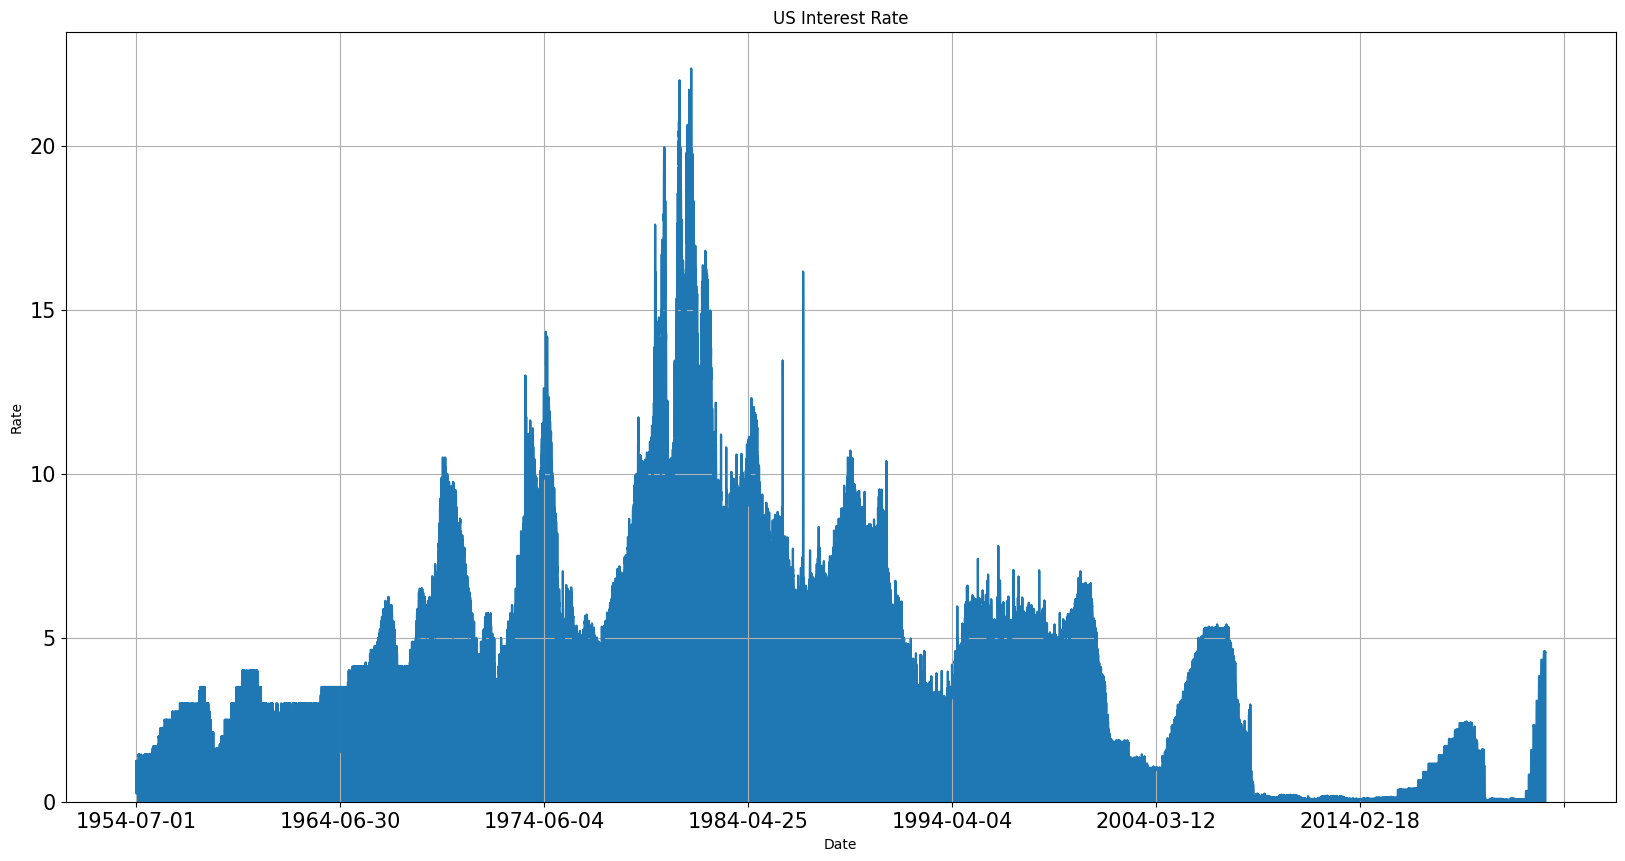

In [7]:
plot = df.plot(
    x="date",
    y="value",
    kind="area",
    figsize=(20, 10),
    title='US Interest Rate',
    grid=True,
    legend=False,
    xlabel='Date',
    ylabel='Rate',
    fontsize=15,
)
plot

In [10]:
plot.get_figure().savefig("data/output/plot.png")